# Run MCMC sampling
# Heavy minimal WITH geometry, fitting log(m_4), log(m_z)

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
import numpy as np

from Likelihood import LEff
from mcmc_utils import heavy_minimal_mcmc

from multiprocessing import Pool
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [17]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

selection = 'cut_based'
set_backend = True
reset_backend = True
n_samples = 10000

spec = 'minimal with geometry and logs'

In [5]:
this_dark_nus_mcmc = heavy_minimal_mcmc(hierarchy, D_or_M, title_addition=spec,
                                   distance=distance, smoothing_pars=smoothing_pars)
df = this_dark_nus_mcmc.provide_df(selection)

heavy majorana


In [6]:
ndim = 3
from ctau_utils import ctau_heavy
def heavy_minimal_posterior_with_geometry_log_masses(parameters):
    '''Posterior in the minimal model with geometry: parameters = [log10_m4, log10_mz, log10_mu_Vmu4_alpha_epsilon2]
       It uses global pars to speed up parallel computation'''
    if (parameters[0] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[0])) or\
       (parameters[0] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.m4_limits[1])) or\
       (parameters[1] < np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[0])) or\
       (parameters[1] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.mz_limits[1])) or\
       (parameters[0] >= parameters[1]) or\
       (parameters[2] <= np.log10(this_dark_nus_mcmc.exp_analysis_obj.lower_bound_Vmu4_alpha_epsilon2)) or\
       (parameters[2] > np.log10(this_dark_nus_mcmc.exp_analysis_obj.upper_bound_Vmu4_alpha_epsilon2)):
        return -np.inf, -np.inf, -np.inf, -np.inf
    else:
        actual_m4 = 10**parameters[0]
        actual_mz = 10**parameters[1]
        actual_Vmu4_alpha_epsilon2 = 10**parameters[2]
        ctau = ctau_heavy(actual_m4, 
                          actual_mz, 
                          actual_Vmu4_alpha_epsilon2, 
                          D_or_M)
        this_mu = actual_Vmu4_alpha_epsilon2/this_dark_nus_mcmc.exp_analysis_obj.Vmu4_alpha_epsilon2
        mu, sigma2 = this_dark_nus_mcmc.exp_analysis_obj.kde_n_events(df=df,
                                                         m4mz=(actual_m4, actual_mz),
                                                         ctau=ctau,
                                                         mu=this_mu,
                                                         distance=this_dark_nus_mcmc.distance,
                                                         smoothing=this_dark_nus_mcmc.smoothing_pars)
        return LEff(0, mu, sigma2), mu, sigma2, ctau

labels = ['log10_m4', 'log10_mz', 'log10_Vmu4_alpha_epsilon2']
blobs_dtype = [('mu', float), ('sigma2', float), ('ctau', float)]

In [7]:
this_dark_nus_mcmc.set_posterior(heavy_minimal_posterior_with_geometry_log_masses, 
                                 ndim, 
                                 labels=labels)

In [19]:
n_walkers = ndim**2
with Pool() as pool:
    this_dark_nus_mcmc.initialise_mcmc(n_walkers, pool,
                                       set_backend=set_backend, reset_backend=reset_backend, 
                                       blobs_dtype=blobs_dtype, log_ms=True)
    this_dark_nus_mcmc.run_mcmc(n_samples)

[-1.52140845 -0.20998372 -8.28057362] (-13764516.701287508, 17135880.06932363, 9029288.265440227, 1660.460523332772)
[ -1.5069339    0.28089695 -11.83764739] (0, 0.0, 0.0, 466071186.6983128)
[-1.43047278  0.44856465 -8.22151412] (0, 0.0, 0.0, 219121.09933501738)
[ -1.77179956  -0.57917191 -16.00086423] (0, 0.0, 0.0, 51966321300.067955)
[-2.26297514 -1.43275543 -6.56421053] (-176863655146916.0, 241869628085590.06, 197296113761350.12, 2.0647661977613954)
[ -1.42445212  -0.16294094 -14.58113809] (0, 0.0, 0.0, 1675647006.1201456)
[-1.24051676  0.26925254 -8.73797136] (-6651.577568859182, 8018.265521519717, 3507.73851217501, 15492.193632669232)
[ -0.89739491   0.62853823 -11.53781155] (0, 0.0, 0.0, 5146198.808136315)
[ -2.09479438  -1.88651786 -15.58518971] (0, 0.0, 0.0, 3697536.963026094)


100%|██████████| 10000/10000 [56:36<00:00,  2.94it/s] 


/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/emcee/autocorr.py:36: RuntimeWarning: invalid value encountered in true_divide
  acf /= acf[0]
N/50 = 0;
tau: [0.99814342        nan 0.77777778]
N/50 = 0;
tau: [1.32586984 1.55514572 1.15435806]
N/50 = 1;
tau: [2.52269687 2.67231921 2.24668148]
N/50 = 1;
tau: [5.06832369 4.34309221 4.50543067]
N/50 = 2;
tau: [10.60491226  9.9636806  10.28599884]
N/50 = 4;
tau: [17.52436295 18.37119751 16.76362324]
N/50 = 7;
tau: [24.7942427  25.9231666  31.66735764]
N/50 = 14;
tau: [54.17568919 35.91354291 40.95075454]
N/50 = 28;
tau: [72.76104026 51.5162876  53.47002023]
N/50 = 54;
tau: [93.16369642 82.1262558  67.91541263]
N/50 = 104;
tau: [175.87976206  91.27542588 188.37306953]


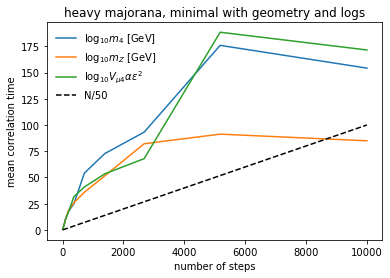

In [18]:
this_dark_nus_mcmc.compute_autocorrelation_time(store=True)

In [10]:
this_dark_nus_mcmc.get_samples(discard=0, thin=1)

N/50 = 2;
tau: [ 9.33487915  8.38375114 10.44776005]
/n/home00/nfoppiani/.conda/envs/dark_nus/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(<Figure size 864x504 with 4 Axes>,
 array([<AxesSubplot:ylabel='$\\log_{10}m_4$ [GeV]'>,
        <AxesSubplot:ylabel='$\\log_{10}m_Z$ [GeV]'>,
        <AxesSubplot:ylabel='$\\log_{10}V_{\\mu 4}\\alpha \\epsilon^2$'>,
        <AxesSubplot:xlabel='step number', ylabel='log(p)'>], dtype=object))

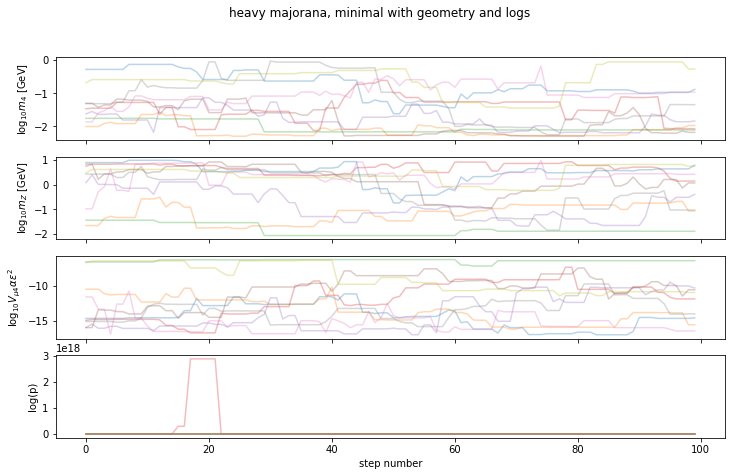

In [11]:
this_dark_nus_mcmc.plot_chains(store=True)

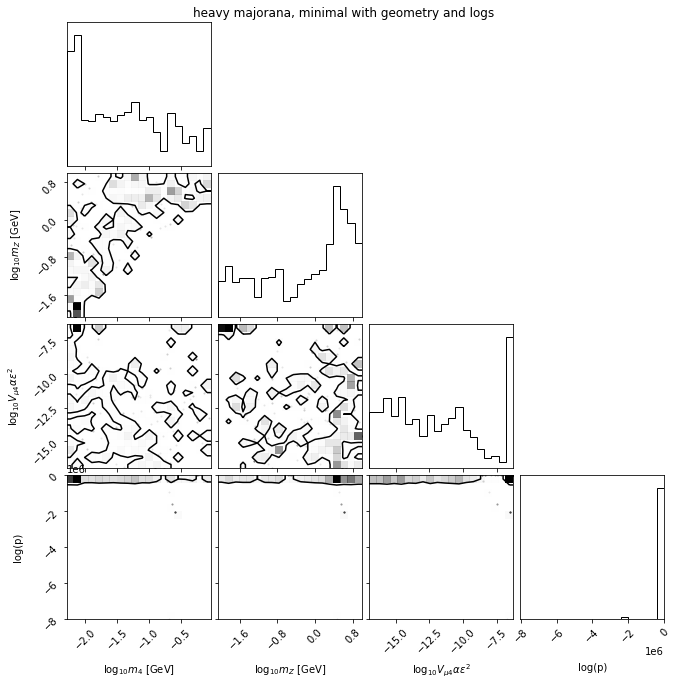

In [12]:
this_dark_nus_mcmc.corner_plot_raw(savefile='raw_corner')

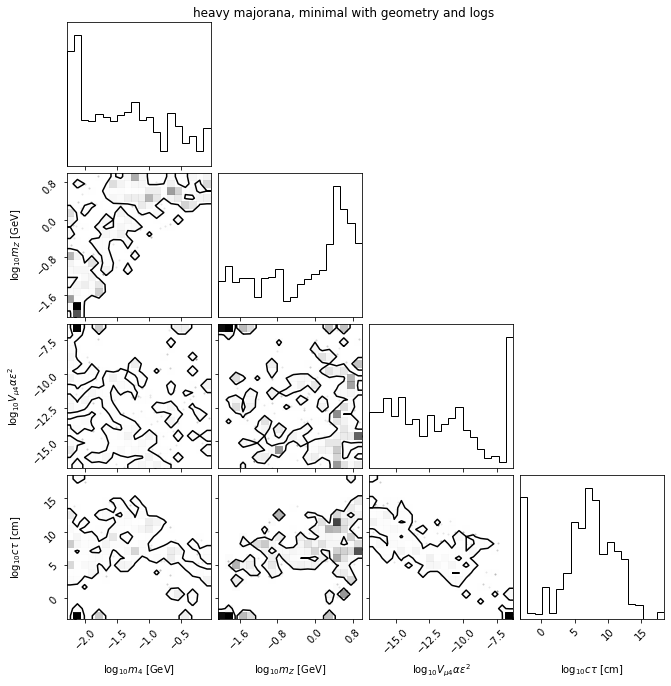

In [13]:
this_dark_nus_mcmc.corner_plot_physics(savefile='physics_corner')

In [14]:
print('Fraction of samples with null expectation =', (this_dark_nus_mcmc.samples['mu'] == 0).sum()/len(this_dark_nus_mcmc.samples))

Fraction of samples with null expectation = 0.88


In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_mu', savefile='corner_log10_mu')

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_sigma/mu', savefile='corner_log10_sigma_mu')

In [ ]:
this_dark_nus_mcmc.corner_plot_with_colour('log10_ctau', savefile='corner_log10_ctau')